In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


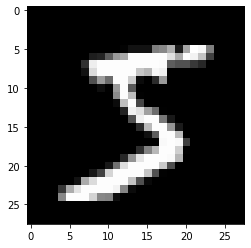

In [3]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

In [4]:
# X_train_new = np.repeat(X_train[:, :, :,np.newaxis], 3, axis=3)
x_train = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)).astype(np.uint8)
x_test =  np.zeros((X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)).astype(np.uint8)
s_train = np.zeros(X_train.shape[0]).astype(np.uint8)
s_test = np.zeros(X_test.shape[0]).astype(np.uint8)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [5]:
train_idx = np.random.permutation(60000)
n_chan_0 = int(3/6 * 60000)
n_chan_1 = int(2/6 * 60000)
n_chan_2 = int(1/6 * 60000)
print(n_chan_0, n_chan_1, n_chan_2)

x_train[train_idx[:n_chan_0], :, :, 0] = X_train[train_idx[:n_chan_0]]
x_train[train_idx[n_chan_0:(n_chan_0+n_chan_1)], :, :, 1] = X_train[train_idx[n_chan_0:(n_chan_0+n_chan_1)]]
x_train[train_idx[(n_chan_0+n_chan_1):], :, :, 2] = X_train[train_idx[(n_chan_0+n_chan_1):]]

s_train[train_idx[0:n_chan_0]] = 0
s_train[train_idx[n_chan_0:(n_chan_0+n_chan_1)]] = 1
s_train[train_idx[(n_chan_0+n_chan_1):]] = 2


test_idx = np.random.permutation(10000)

x_test[test_idx[0:3333], :, :, 0] = X_test[test_idx[0:3333], :, :]
x_test[test_idx[3333:6666], :, :, 1] = X_test[test_idx[3333:6666], :, :]
x_test[test_idx[6666:], :, :, 2] = X_test[test_idx[6666:], :, :]

s_test[test_idx[0:3333]] = 0
s_test[test_idx[3333:6666]] = 1
s_test[test_idx[6666:]] = 2

30000 10000 10000


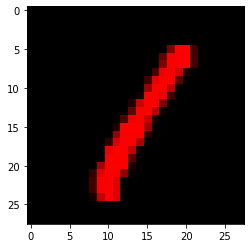

In [34]:
plt.imshow(x_train[3])
plt.show()

In [7]:
save_path = "./Colored_MNIST"
#unbalanced
np.savez(f"{save_path}/colored_mnist_unbalanced.npz", x_train=x_train, y_train=Y_train, s_train=s_train, x_test=x_test, y_test=Y_test, s_test=s_test)

In [4]:
save_path = "./Colored_MNIST"
data = np.load(f"{save_path}/colored_mnist_unbalanced.npz")
print(data['x_train'].shape)

(60000, 28, 28, 3)


In [33]:
s_train[:10]

array([2, 2, 2, 0, 1, 1, 0, 0, 1, 0], dtype=uint8)